In [1]:
import pandas as pd
import numpy as np
import re #library for regular expression
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
import itertools
import random

pd.set_option('display.max_columns', None)

recipes = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/data/recipes.csv")

print("Data read into dataframe")

Data read into dataframe


In [2]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [3]:
recipes.shape

(57691, 384)

In [4]:
# checks if ingredients exist in data frame

ingredients = list(recipes.columns.values)

print ([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(rice).*")).search(ingredient)] if match])
print ([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(wasabi).*")).search(ingredient)] if match])
print ([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(soy).*")).search(ingredient)] if match])

['brown_rice', 'licorice', 'rice']
['wasabi']
['soy_sauce', 'soybean', 'soybean_oil']


In [5]:
# checks data to see if it needs cleansing
recipes["country"].value_counts() # frequency table

American        40150
Mexico           1754
Italian          1715
Italy            1461
Asian            1176
                ...  
Indonesia          12
Belgium            11
East-African       11
Israel              9
Bangladesh          4
Name: country, Length: 69, dtype: int64

In [6]:
# changed the name of first column to cuisine

column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# recipes

In [7]:
# make cuisine names lowercase

recipes["cuisine"] = recipes["cuisine"].str.lower()

# recipes

In [8]:
# .loc accesses a group of rows and columns by labels or a boolean array (pandas)
# making cuisine names consistent

recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "isreal", "cuisine"] = "isreali"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portugese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portugese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"

# recipes

In [9]:
# remove cusines < 50 recipes
# list of cuisines to keep

recipes_counts = recipes["cuisine"].value_counts()

cuisines_indices = recipes_counts > 50 

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])

In [10]:
rows_before = recipes.shape[0] # number of rows in original dataframe
print(f"Number of rows in original dataframe is {rows_before}.")

recipes = recipes.loc[recipes['cuisine'].isin(cuisines_to_keep)] # is in takes only the rows that are in both df's and attaches to recipe

rows_after = recipes.shape[0] # rows that are left (processed)
print(f"Number of rows processed in dataframe is {rows_after}.")

print(f"{rows_before - rows_after} rows removed")

Number of rows in original dataframe is 57691.
Number of rows processed in dataframe is 57394.
297 rows removed


In [11]:
# turns to numerical data set (converts yes to 1 and no to 0)

recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

# recipes

In [12]:
# gets recipes that contain rice, soy, wasabi and seaweed (if and only if all is included)

check_recipes = recipes.loc[
    (recipes["rice"] == 1) &
    (recipes["soy_sauce"] == 1) &
    (recipes["wasabi"] == 1) &
    (recipes["seaweed"] == 1)
]

# check_recipes

In [13]:
# count ingredients
# select a particular cell of the dataset, helps select a value that belongs to a particular row or column from a set of values of a data frame or dataset
# axis 0 = rows and axis 1 = columns

ing = recipes.iloc[:, 1:].sum(axis=0) # sum of each column

In [14]:
# defines columns as pandas series
# pd series is a 1d array holding only 1 column
# .arange returns an array with evenly spaced elements as per the interval
ingredient = pd.Series(ing.index.values, index = np.arange(len(ing)))
count = pd.Series(list(ing), index = np.arange(len(ing)))

# create dataframe
ing_df = pd.DataFrame(dict(ingredient = ingredient, count = count))
ing_df = ing_df[["ingredient", "count"]]
# print(ing_df.to_string())

In [15]:
# made df of ingredients and have total counts throughout all recipes
# sort df in descending order

ing_df.sort_values(["count"], ascending=False, inplace=True) # when inplace=True is passed, the data is renamed in place (it returns nothing)
ing_df.reset_index(inplace=True, drop=True)

print(ing_df)


          ingredient  count
0                egg  21022
1              wheat  20775
2             butter  20715
3              onion  18078
4             garlic  17351
..               ...    ...
378   strawberry_jam      1
379  sturgeon_caviar      1
380      kaffir_lime      1
381            beech      1
382           durian      0

[383 rows x 2 columns]


In [16]:
# find ingredients chinese people use

cuisines = recipes.groupby("cuisine").mean()
cuisines.head()


,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
cuisine,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
african,0.156522,0.000000,

In [17]:
# almond is present across 15.65% of all of the African recipes
# butter is present across 38.11% of all of the Canadian recipes

In [18]:
# profile for each cuisine // display top four ingredients in each cuisine

num_ingredients = 4 # num of top ingredients

# function prints top ing for each cuisine

def print_top_ingredients(row):
    print(row.name.upper())
    row_sorted = row.sort_values(ascending=False)*100
    top_ingredients = list(row_sorted.index.values)[0:num_ingredients]
    row_sorted = list(row_sorted)[0:num_ingredients]

    for ind, ingredient in enumerate(top_ingredients):
        print("%s (%d%%)" % (ingredient, row_sorted[ind]), end= ' ') # string interpolation & placeholder for decimal
    print("\n")

# applies function
create_cuisine_profiles = cuisines.apply(print_top_ingredients, axis=1)

AFRICAN
onion (53%) olive_oil (52%) garlic (49%) cumin (42%) 

AMERICAN
butter (41%) egg (40%) wheat (39%) onion (29%) 

ASIAN
soy_sauce (49%) ginger (48%) garlic (47%) rice (41%) 

CAJUN_CREOLE
onion (69%) cayenne (56%) garlic (48%) butter (36%) 

CANADIAN
wheat (39%) butter (38%) egg (35%) onion (34%) 

CARIBBEAN
onion (51%) garlic (50%) vegetable_oil (31%) black_pepper (31%) 

CENTRAL_SOUTHAMERICAN
garlic (56%) onion (54%) cayenne (51%) tomato (41%) 

CHINESE
soy_sauce (68%) ginger (53%) garlic (52%) scallion (48%) 

EAST_ASIAN
garlic (55%) soy_sauce (50%) scallion (49%) cayenne (47%) 

EASTERN-EUROPE
wheat (53%) egg (52%) butter (48%) onion (45%) 

EASTERNEUROPEAN_RUSSIAN
butter (60%) egg (50%) wheat (49%) onion (38%) 

ENGLISH_SCOTTISH
butter (67%) wheat (62%) egg (53%) cream (41%) 

FRENCH
butter (50%) egg (44%) wheat (37%) olive_oil (27%) 

GERMAN
wheat (64%) egg (60%) butter (47%) onion (34%) 

GREEK
olive_oil (76%) garlic (44%) onion (36%) lemon_juice (33%) 

INDIAN
cumin (60%

In [19]:
# decision tree for some recipes excluding american cuisine since the data is biased towards it (decision tree will not be as accurate if it has biased data)
# select subset of cuisines
# the maximum depth that you allow the tree to grow to. the deeper you allow, the more complex your model will become

asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_recipes["cuisine"]
ingredients = asian_indian_recipes.iloc[:,1:]

bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree")


Decision tree model saved to bamboo_tree


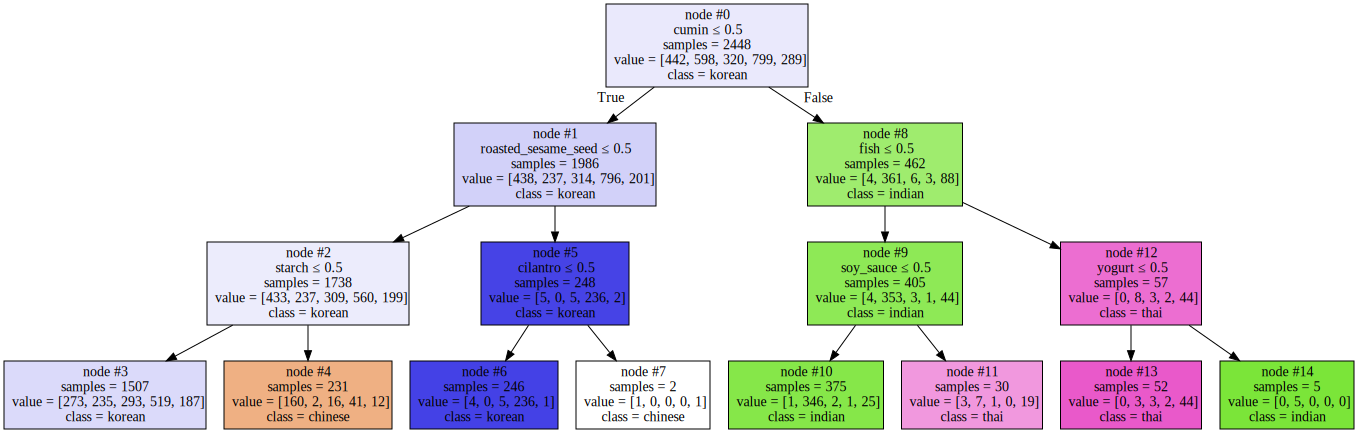

In [20]:
# plot decision tree

export_graphviz(bamboo_tree, 
                feature_names=list(ingredients.columns.values),
                out_file = "bamboo_tree.dot",
                class_names=np.unique(cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_tree.dot") as bamboo_tree_image:
    bamboo_tree_graph = bamboo_tree_image.read()
graphviz.Source(bamboo_tree_graph)

In [21]:
# decision tree shows f a recipe contains cumin and fish and no yoghurt, then it is most likely a thai recipe
# if a recipe contains cumin but no fish and no soy_sauce, then it is most likely an indian recipe

In [23]:
# split into training and test to evaluate asian and indian cuisines
# new dataframe w only data on asian and indian cuisines

bamboo = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]

In [26]:
# amount of recipes for each cuisine
bamboo["cuisine"].value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

In [27]:
# remove 30 from each for test set

sample_n = 30 # sample size

In [30]:
# 30 recipes from each cuisine

random.seed(1234) # random number
bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n)) # lambda small anonymous function

bamboo_test_ingredients = bamboo_test.iloc[:,1:] # ingredients
bamboo_test_cuisines = bamboo_test["cuisine"]

In [31]:
# 30 recipes check
bamboo_test["cuisine"].value_counts()

chinese     30
korean      30
thai        30
indian      30
japanese    30
Name: cuisine, dtype: int64

In [33]:
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]

bamboo_train_ingredients = bamboo_train.iloc[:,1:]
bamboo_train_cuisines = bamboo_train["cuisine"]

In [35]:
bamboo_train["cuisine"].value_counts()

korean      769
indian      568
chinese     412
japanese    290
thai        259
Name: cuisine, dtype: int64

In [36]:
# make test set decision tree

bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)

print ("Decision tree model saved to bamboo_train_tree")

Decision tree model saved to bamboo_train_tree


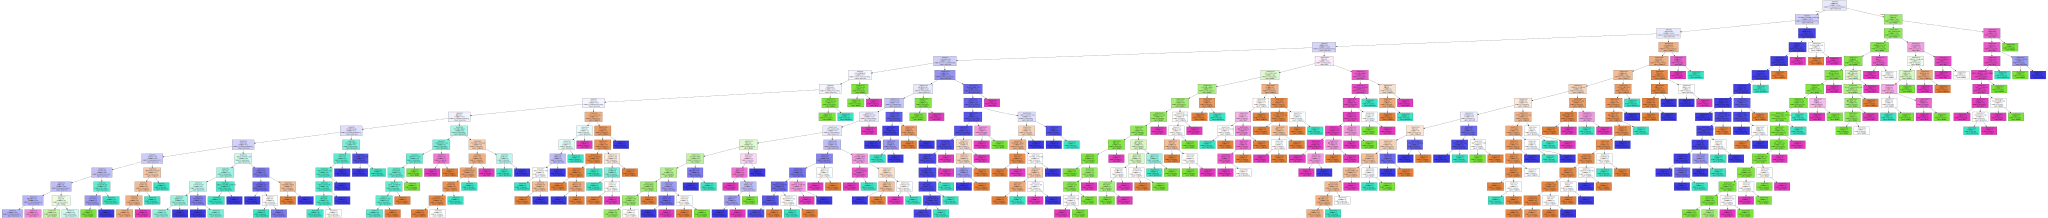

In [41]:
# define tree to be deeper

export_graphviz(bamboo_train_tree,
                feature_names=list(bamboo_train_ingredients.columns.values),
                out_file="bamboo_train_tree.dot",
                class_names=np.unique(bamboo_train_cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_train_tree.dot") as bamboo_train_tree_image:
    bamboo_train_tree_graph = bamboo_train_tree_image.read()

graphviz.Source(bamboo_train_tree_graph)


In [42]:
# test

bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)

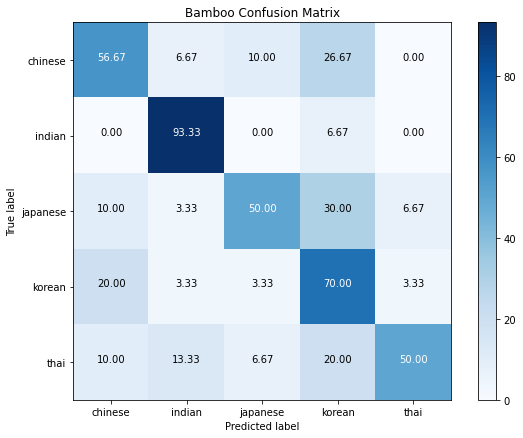

In [47]:
# confusion matrix

test_cuisines = np.unique(bamboo_test_cuisines)
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, test_cuisines)
title = 'Bamboo Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8,6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap = cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i,j], fmt),
            horizontalalignment="center",
            color="white" if bamboo_confusion_matrix[i,j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

# the rows represent the actual cuisines from the dataset and the columns represent the predicted ones 
# each row should sum to 100% 
# according to this confusion matrix
# the first row in the confusion matrix, 56.670% of the chinese recipes in bamboo_test were correctly classified by our decision tree whereas 26.67% of the chinese recipes were misclassified as Korean and 6.67% were misclassified as Indian.

# in the indian row, 93% of the indian recipes in bamboo_test were correctly classified by our decision tree and 0% of the Indian recipes were misclassified as Chinese and 6% were misclassified as Korean and 0% were misclassified as Thai.

# 10 percent japanese misclassified as chinese, 3% indian, 50% japanese, 30% korean, 6% thai

# etc